In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
df = yf.download("NVDA", start="2020-01-01", end="2025-05-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971747,5.971747,5.892343,5.942873,237536000
2020-01-03,5.876163,5.919972,5.827126,5.852018,205384000
2020-01-06,5.900806,5.906033,5.756684,5.782820,262636000
2020-01-07,5.972244,6.018044,5.884127,5.929181,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000
...,...,...,...,...,...
2025-04-24,106.422607,106.532600,103.102838,103.472815,220815000
2025-04-25,111.002296,111.912229,105.722664,106.842582,251064700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1339 entries, 2020-01-02 to 2025-04-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1339 non-null   float64
 1   (High, NVDA)    1339 non-null   float64
 2   (Low, NVDA)     1339 non-null   float64
 3   (Open, NVDA)    1339 non-null   float64
 4   (Volume, NVDA)  1339 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.8 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1339.000000,1339.000000,1339.000000,1339.000000,1.339000e+03
mean,43.446979,44.283656,42.533640,43.457073,4.374405e+08
std,42.119496,42.960354,41.235753,42.195470,1.878455e+08
min,4.891637,5.228871,4.500107,4.983792,9.788400e+07
25%,13.788564,14.047061,13.570758,13.842897,2.948990e+08
50%,22.346224,22.816368,21.988451,22.441294,4.107350e+08
75%,49.499973,49.975758,48.997388,49.643220,5.404120e+08
max,149.405869,153.105279,147.796143,153.005289,1.543911e+09


In [ ]:
df.duplicated().sum()

np.int64(0)

Plots

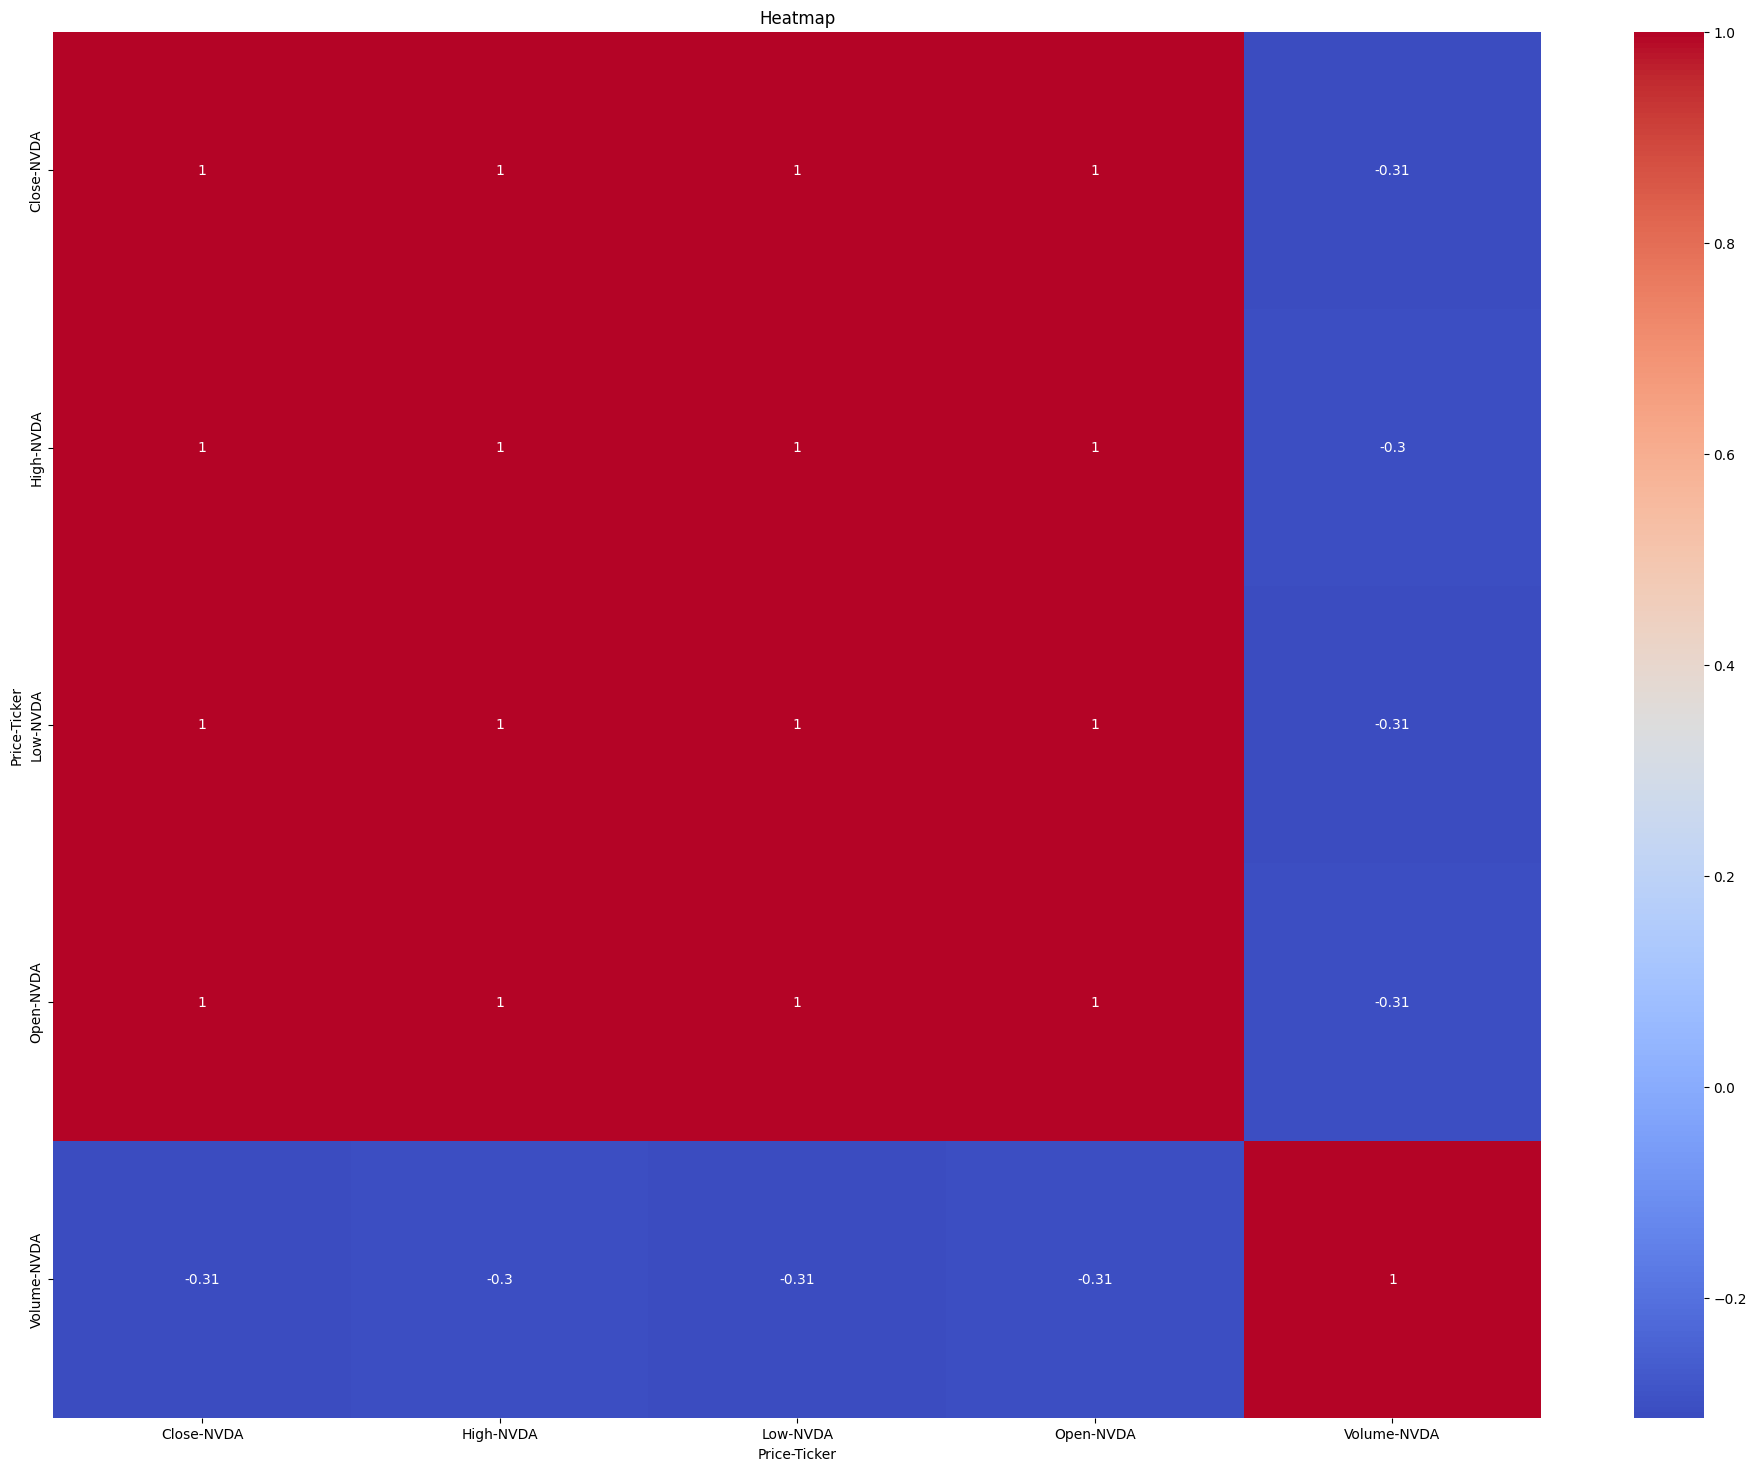

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()

This heatmap shows relation among different entitites

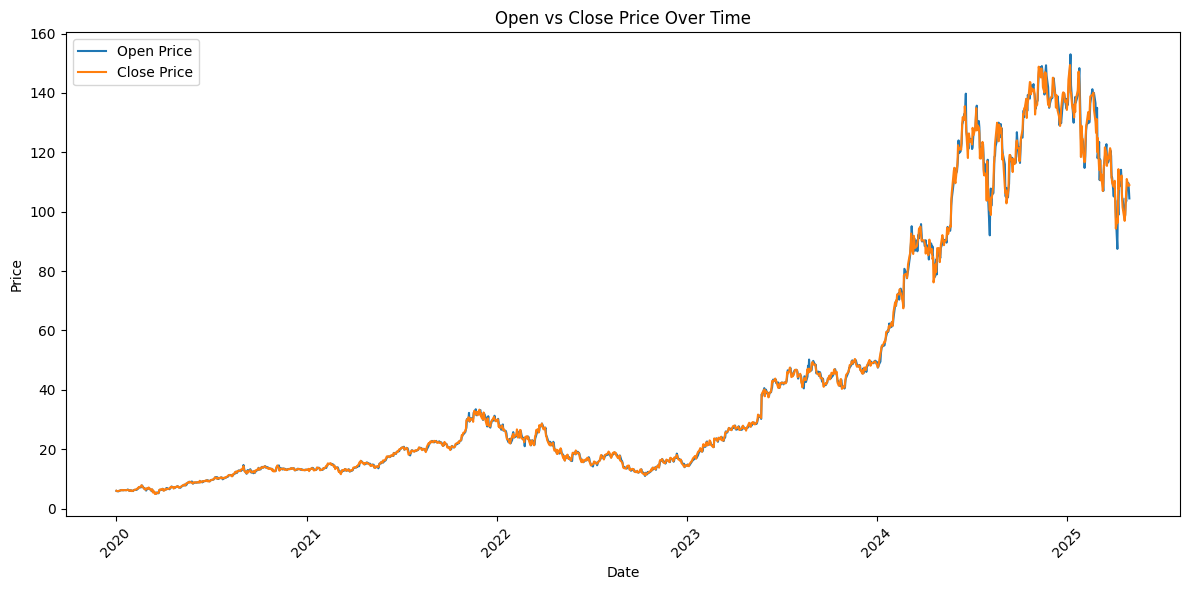

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open Price')
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Open vs Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

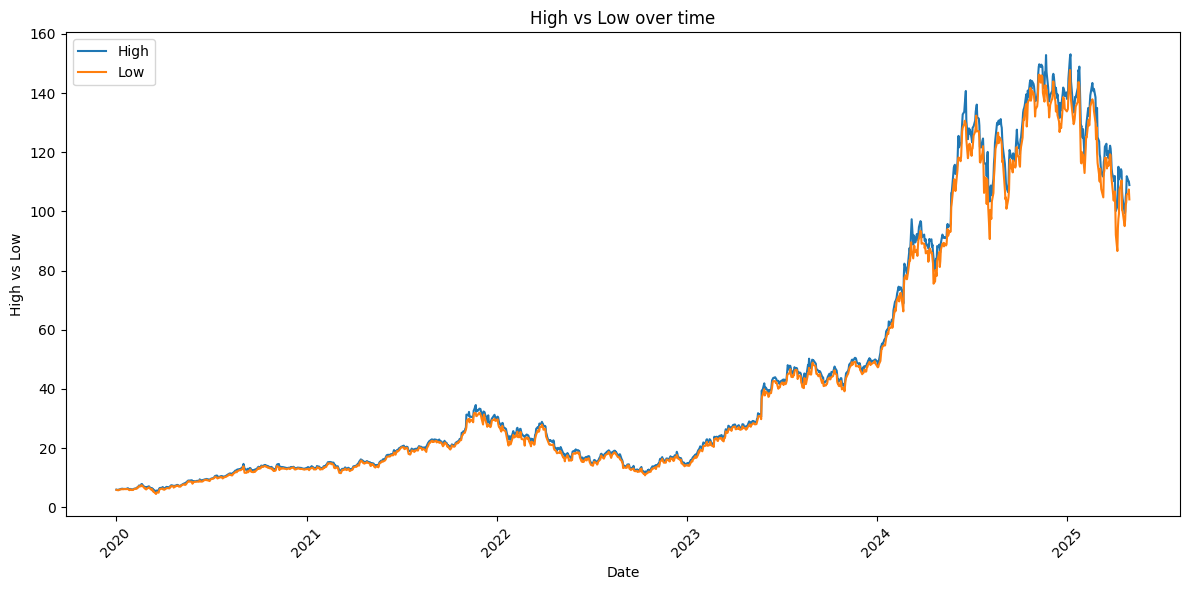

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.title('High vs Low over time')
plt.ylabel('High vs Low')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

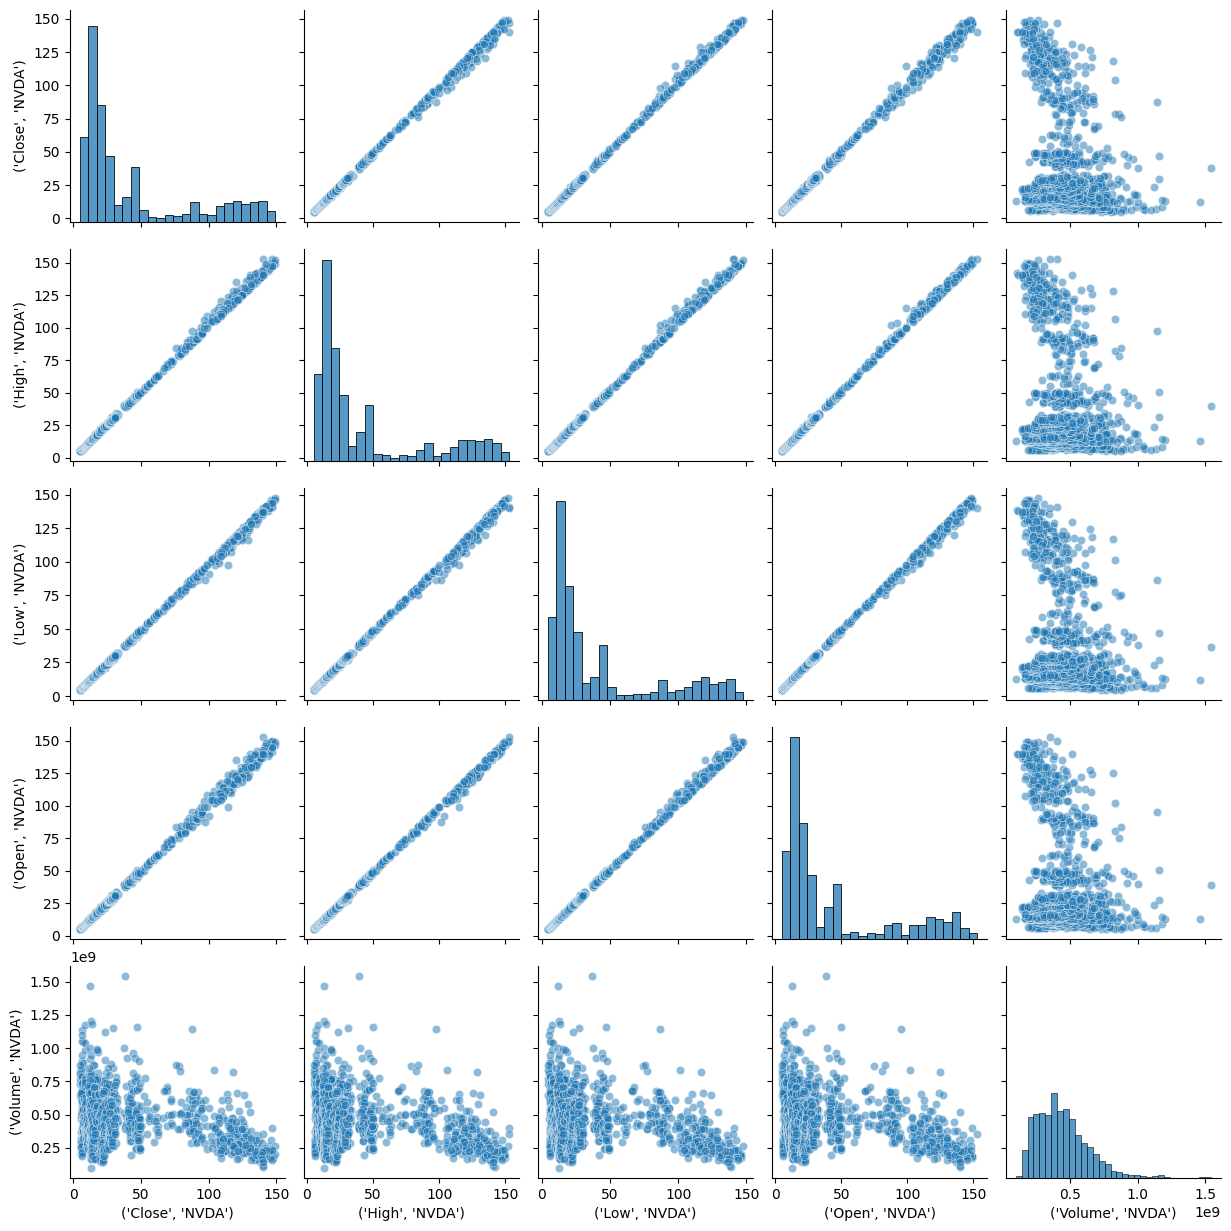

In [ ]:
sns.pairplot(df, kind = 'scatter', plot_kws={'alpha':0.5})

  This map shows linear regression

Removing outliers:

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <=(upper_bound))]

In [ ]:
df['Price']=(df['Open']+df['Close'])/2
df

Price,Close,High,Low,Open,Volume,Price
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2020-01-02,5.971747,5.971747,5.892343,5.942873,237536000,5.957310
2020-01-03,5.876163,5.919972,5.827126,5.852018,205384000,5.864091
2020-01-06,5.900806,5.906033,5.756684,5.782820,262636000,5.841813
2020-01-07,5.972244,6.018044,5.884127,5.929181,314856000,5.950713
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000,5.975729
...,...,...,...,...,...,...
2023-10-26,40.304520,42.233492,39.858758,41.830707,541001000,41.067613
2023-10-27,40.478428,41.184053,39.993686,41.108093,416784000,40.793261


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['Predict'] = df['Close'].shift(-1)
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].shift(1)
df = df.dropna()
X = df[['Volume', 'High', 'Low', 'Open', 'Close']]
y = df['Predict']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized Data:\n", X_scaled)

Standardized Data:
 [[-1.26015752 -1.49038173 -1.47020238 -1.48052187 -1.47650484]
 [-1.45088729 -1.49661137 -1.47836056 -1.4916767  -1.48821918]
 [-1.11126112 -1.49828857 -1.48717245 -1.5001726  -1.48519905]
 ...
 [ 0.54003558  2.87272051  2.77877036  2.92565871  2.7311668 ]
 [-0.19683552  2.74644946  2.7956489   2.83693882  2.75248022]
 [-0.36741978  2.81379352  2.85391097  2.831662    2.83344587]]


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.3 , random_state = 41)

In [ ]:
X_train

array([[-1.30884842, -0.41182971, -0.37626694, -0.39633189, -0.39731517],
       [ 0.07242969,  2.83430328,  2.84936916,  2.79590886,  2.92060419],
       [ 0.54859564, -1.40592127, -1.39536005, -1.4046768 , -1.3935293 ],
       ...,
       [-0.75459788, -0.59571719, -0.57460635, -0.60615629, -0.56997225],
       [-1.42696895, -0.34442715, -0.30840709, -0.32819783, -0.34052178],
       [-0.48091324, -1.30906442, -1.29974123, -1.30663959, -1.31175479]])

In [ ]:
y_train

,Predict
Date,
2021-05-10,14.272654
2023-06-28,40.796890
2020-04-09,6.721020
2023-08-10,40.829876
2022-11-03,14.139811
...,...
2021-09-01,22.352468
2022-06-13,15.813191
2021-01-06,13.308069


In [ ]:
X_test

array([[ 0.57765713, -0.68749695, -0.68115254, -0.67832001, -0.71148028],
       [ 0.47584995, -0.281845  , -0.31086366, -0.25347719, -0.31541695],
       [-0.94608696, -0.57601018, -0.55703576, -0.5548816 , -0.57580225],
       ...,
       [-1.22425035,  0.40360974,  0.42979039,  0.39841773,  0.45153686],
       [-0.15236829, -1.13637837, -1.12536391, -1.14209434, -1.1375219 ],
       [-1.07513446,  0.42822805,  0.4390294 ,  0.40797573,  0.47538887]])

In [ ]:
y_test

,Predict
Date,
2022-09-27,12.721434
2022-08-31,13.627342
2020-10-23,13.101993
2021-03-24,12.505813
2020-03-12,5.998481
...,...
2021-07-30,19.708139
2020-01-08,6.049159
2021-10-15,22.178806


Linear Regression

In [ ]:
from sklearn. linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train , y_train)

LinearRegression()

In [ ]:
print("Weights (coefficients):", lm.coef_)
print("Bias (intercept):", lm.intercept_)

Weights (coefficients): [ 0.0389287   1.87587912  5.75980928 -3.37496351  3.8841019 ]
Bias (intercept): 18.089954537701534


In [ ]:
lm.coef_

array([ 0.0389287 ,  1.87587912,  5.75980928, -3.37496351,  3.8841019 ])

In [ ]:
cdf = pd.DataFrame(lm.coef_ , X.columns , columns = ['Coeff'])
print(cdf)

                  Coeff
Price  Ticker          
Volume NVDA    0.038929
High   NVDA    1.875879
Low    NVDA    5.759809
Open   NVDA   -3.374964
Close  NVDA    3.884102


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([12.42531546, 15.41962088, 13.40040995, 13.15470652,  6.20715164,
       19.81043579, 23.15846826, 22.66873727,  7.9025529 , 24.67585859,
       13.44414006, 20.68091199, 13.2955922 , 26.24728143, 13.50699625,
       12.32933138, 26.29630033, 18.63532568, 13.15079731, 13.43940266,
       29.01470354, 20.56629553, 23.20433658, 22.43740866, 25.98569994,
       16.21967513, 17.10597899, 42.81157051, 12.6574073 , 24.4322375 ,
       18.98401707, 11.85764663, 31.38746738, 19.6086504 , 13.80712645,
       16.99566255, 29.79054641, 16.1925827 , 25.32049421, 26.62132549,
       14.91380392, 21.29002601, 30.39259451, 15.48701971, 23.85360743,
       24.19103809, 13.88864919, 26.39536191,  5.9646367 , 39.41636503,
       16.57627184, 13.33218733, 42.63043629, 13.27243521, 27.69709353,
       30.20742109, 30.42166999, 16.59706932, 16.88246608, 20.1408134 ,
        6.89799469, 19.21539943, 27.55077013, 24.30064181, 24.88062208,
       22.73430869, 13.4512643 , 26.19125475, 23.29906626, 20.38

In [ ]:
predictions.mean()

np.float64(19.70051653876009)

In [ ]:
y_test.mean()

np.float64(19.73623487885914)

<Axes: xlabel='Predict'>

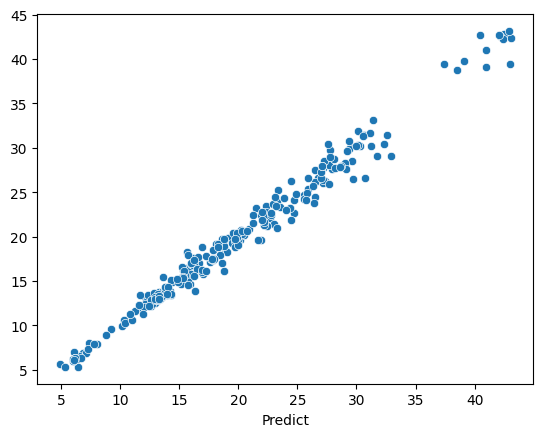

In [ ]:
sns.scatterplot(x=y_test , y=predictions)

In [ ]:
print("Mean absolute Error:" , mean_absolute_error(y_test , predictions))
print("Mean Squared Error:" , mean_squared_error(y_test, predictions))
print("R2 Score:" , r2_score(y_test, predictions))

Mean absolute Error: 0.7459557159678146
Mean Squared Error: 1.0739396418210991
R2 Score: 0.9843517468314277


Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor( random_state=41)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=41)

In [ ]:
tree_pred=tree.predict(X_test)

In [ ]:
tree_pred

array([12.1251173 , 14.50208092, 13.40010357, 13.4484396 ,  6.19626951,
       20.593256  , 24.59312057, 24.59312057,  8.71752262, 26.65635681,
       13.04865742, 20.79051208, 12.95876312, 23.59893417, 13.24583244,
       12.82580757, 25.59166336, 19.36885643, 13.16092968, 12.58053303,
       30.40352249, 19.69364929, 24.66895485, 21.76864815, 26.1801796 ,
       16.50319481, 16.75010872, 42.36193466, 13.24099922, 24.16362953,
       16.92200661, 11.94632053, 33.31112671, 19.86280632, 12.77027225,
       18.02400589, 31.65523911, 15.13562202, 26.4093132 , 26.96461487,
       14.27265358, 19.48277283, 38.91801834, 16.01965904, 21.47847176,
       22.67784119, 14.18350601, 26.96461487,  5.90080595, 38.62622833,
       15.13562202, 13.38215542, 42.29097366, 12.67701817, 30.88863182,
       28.10970497, 31.61343575, 17.78134727, 16.59524918, 20.65462685,
        6.80669928, 19.4576664 , 26.86168671, 23.34739113, 26.65635681,
       24.66895485, 13.54965401, 23.59893417, 22.297575  , 21.03

In [ ]:
y_test

,Predict
Date,
2022-09-27,12.721434
2022-08-31,13.627342
2020-10-23,13.101993
2021-03-24,12.505813
2020-03-12,5.998481
...,...
2021-07-30,19.708139
2020-01-08,6.049159
2021-10-15,22.178806


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean absolute Error:" , mean_absolute_error(y_test , tree_pred))
print("Mean Squared Error:" , mean_squared_error(y_test, tree_pred))
print("R2 Score:" , r2_score(y_test, tree_pred))

Mean absolute Error: 1.0501020997196095
Mean Squared Error: 2.5186031881525346
R2 Score: 0.9633017175410781


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=41)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=41)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Mean absolute Error:" , mean_absolute_error(y_test , y_pred))
print("Mean Squared Error:" , mean_squared_error(y_test, y_pred))
print("R2 Score:" , r2_score(y_test, y_pred))

Mean absolute Error: 0.804884522532329
Mean Squared Error: 1.3464962995622805
R2 Score: 0.9803803545696786


In [ ]:
df.to_csv('cleaned_task.csv')